## Finishing Order Classification: Exploratory Data Analysis

This notebook contains the exploratory data analysis for the project: "Classifying the Field". The goal is to explore the relationships between different factors, and a driver's finishing position. It also finds the factor that serves as the best baseline for making predictions:

#### Table of Contents
* The Data Set
* Establishing Baseline Predictors
* Visualizing Relevant Factors
* Exploration of Randomness in F1 Results

#### Data Sources
* Historic Formula 1 Race Data from: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020
* Free Practice Data scrubbed from: https://www.formula1.com/en/results.html
* Real World Predictinos scrubbed from: https://backofthegrid.com/prediction-results

In [65]:
# Imports libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


### The Data Set

In [120]:
# Imports 'results', 'races', and 'circuits' data as data frames
res = pd.read_csv('f1_archive/results.csv')
races = pd.read_csv('f1_archive/races.csv')
circ = pd.read_csv('f1_archive/circuits.csv')
wdc = pd.read_csv('f1_archive/driver_standings.csv')
wcc = pd.read_csv('f1_archive/constructor_standings.csv')
full_res = pd.read_csv('f1_archive/full_results_post_2014.csv')
drivers = pd.read_csv('f1_archive/drivers.csv')

races[races['year'] == 2021]
wdc[wdc['raceId'] == 1073].head()



,driverStandingsId,raceId,driverId,points,position,positionText,wins
33353,70740,1073,1,387.5,2,2,8
33354,70741,1073,830,395.5,1,1,10
33355,70742,1073,822,226.0,3,3,1
33356,70743,1073,846,160.0,6,6,0
33357,70744,1073,815,190.0,4,4,1


In [4]:
# Builds the data frame to be used in the classifier.
data = full_res.loc[:,['resultId', 'raceId', 'driverId', 'constructorId', 'positionOrder', 'fp1Pos', 'fp2Pos']]

data['code'] = ''
data['circuitId'] = ''
data['year'] = 0

for i in data.index:
        id = data.loc[i,'driverId']
        code = drivers[drivers['driverId'] == id]['code'].to_list()[0]
        raceId = data.loc[i,'raceId']
        circuitId = races[races['raceId'] == raceId]['circuitId'].to_list()[0]
        year = races[races['raceId'] == raceId]['year'].to_list()[0]
        data.loc[i,'code'] = code
        data.loc[i,'circuitId'] = circuitId
        data.loc[i,'year'] = year

# Defines a function to find the race ID of the previous race
def find_last(ID):
    row = races[races['raceId'] == ID].index
    year = races.loc[row, 'year'].to_list()[0]
    round = races.loc[row, 'round'].to_list()[0]

    if round == 1:
        year = year - 1
        round = races[races['year'] == year].loc[:,'round'].max()
    else:
        round = round - 1

    last_id = races[(races['year'] == year) & (races['round'] == round)]['raceId'].to_list()[0]
    #print(year, round)
    #print(last_id)
    return last_id

# Adds columns for lastPos, lastGrid, wdcPos, and wccPos
data['lastPos'] = np.nan
data['lastPos2'] = np.nan
data['lastPos3'] = np.nan
data['lastPos4'] = np.nan
data['lastPos5'] = np.nan
data['lastPos6'] = np.nan

data['lastGrid'] = np.nan
data['lastGrid2'] = np.nan
data['lastGrid3'] = np.nan

data['wdcPos'] = np.nan
data['wccPos'] = np.nan

data['experience'] = 0

for i in data.index:
    current_id = data.loc[i,'raceId']
    lastId = find_last(current_id)
    lastId2 = find_last(lastId)
    lastId3 = find_last(lastId2)
    lastId4 = find_last(lastId3)
    lastId5 = find_last(lastId4)
    lastId6 = find_last(lastId4)

    driverId = data.loc[i,'driverId']
    constructorId = data.loc[i,'constructorId']
    
    try:
        result = full_res[(full_res['raceId'] == lastId) & (full_res['driverId'] == driverId)]['positionOrder'].to_list()[0]
        data.loc[i,'lastPos'] = result
    except:
        pass
    
    try:
        result = full_res[(full_res['raceId'] == lastId2) & (full_res['driverId'] == driverId)]['positionOrder'].to_list()[0]
        data.loc[i,'lastPos2'] = result
    except:
        pass

    try:
        result = full_res[(full_res['raceId'] == lastId3) & (full_res['driverId'] == driverId)]['positionOrder'].to_list()[0]
        data.loc[i,'lastPos3'] = result
    except:
        pass

    try:
        result = full_res[(full_res['raceId'] == lastId4) & (full_res['driverId'] == driverId)]['positionOrder'].to_list()[0]
        data.loc[i,'lastPos4'] = result
    except:
        pass

    try:
        result = full_res[(full_res['raceId'] == lastId5) & (full_res['driverId'] == driverId)]['positionOrder'].to_list()[0]
        data.loc[i,'lastPos5'] = result
    except:
        pass

    try:
        result = full_res[(full_res['raceId'] == lastId6) & (full_res['driverId'] == driverId)]['positionOrder'].to_list()[0]
        data.loc[i,'lastPos6'] = result
    except:
        pass

    try:
        grid = full_res[(full_res['raceId'] == lastId) & (full_res['driverId'] == driverId)]['grid'].to_list()[0]
        data.loc[i,'lastGrid'] = grid
    except:
        pass

    try:
        grid = full_res[(full_res['raceId'] == lastId2) & (full_res['driverId'] == driverId)]['grid'].to_list()[0]
        data.loc[i,'lastGrid2'] = grid
    except:
        pass

    try:
        grid = full_res[(full_res['raceId'] == lastId3) & (full_res['driverId'] == driverId)]['grid'].to_list()[0]
        data.loc[i,'lastGrid3'] = grid
    except:
        pass

    try:
        wdc_pos = wdc[(wdc['raceId'] == lastId) & (wdc['driverId'] == driverId)]['position'].to_list()[0]
        data.loc[i,'wdcPos'] = wdc_pos
    except:
        pass

    try:
        wcc_pos = wcc[(wcc['raceId'] == lastId) & (wcc['constructorId'] == constructorId)]['position'].to_list()[0]
        data.loc[i,'wccPos'] = wcc_pos
    except:
        pass

    try:
        races_in = res[res['driverId'] == driverId]['raceId'].to_list()
        current_year = races[races['raceId'] == current_id]['year'].to_list()[0]
        experience = races[ (races['raceId'].isin(races_in)) & (races['year'] < current_year)].shape[0]
        data.loc[i,'experience'] = experience
    except:
        pass

# Handles wierd case in free practice data
for factors in ['fp1Pos', 'fp2Pos']:
    for i in data.index:
        if data.loc[i,factors] == -1:
            data.loc[i,factors] = np.nan
        else:
            pass

# Adds a column containing each drivers relative performance at each track
driver_list = data['driverId'].drop_duplicates().to_list()
race_list = data['raceId'].drop_duplicates().to_list()
track_list = data['circuitId'].drop_duplicates().to_list()

years_list = list(range(2010,2022))

# Builds a 3d matrix (list) containing the drivers performances at each circuit
cols = ['driverId', 'code', 'circuitId', 'name'] + years_list
matrix = pd.DataFrame(columns = cols)

for people in driver_list:

    for tracks in track_list:
        code = drivers.loc[drivers[drivers['driverId'] == people].index, 'code'].to_list()[0]
        circuit = circ.loc[circ[circ['circuitId'] == tracks].index, 'circuitRef'].to_list()[0]
        row = [people, code, tracks, circuit]
        
        for years in years_list:
            try:
                id = races[(races['year'] == years) & (races['circuitId'] == tracks)]['raceId'].to_list()[0]
                pos = res[(res['driverId'] == people) & (res['raceId'] == id)]['positionOrder'].to_list()[0]
            except:
                pos = np.nan
            
            row.append(pos)

        matrix.loc[matrix.shape[0]] = row

# Computes the relative performance of each driver at each circuit based on finishing position
def position_to_performance(x, mean, finishers):
    if x < mean:
        a = 2 ** (1 / (mean - 1))
        b = (a ** (mean - x)) -1
    else:
        a = 2 ** (1 / (mean - finishers))
        b = (-1 * (a ** (mean - x))) +1
    y = 0.5 + (0.5 * b)
    return y

performance_matrix = pd.DataFrame(columns= cols)

for people in driver_list:

    for tracks in track_list:
        code = drivers.loc[drivers[drivers['driverId'] == people].index, 'code'].to_list()[0]
        circuit = circ.loc[circ[circ['circuitId'] == tracks].index, 'circuitRef'].to_list()[0]
        row = [people, code, tracks, circuit]
        
        for years in years_list:
            try:
                pos = matrix[(matrix['driverId'] == people) & (matrix['circuitId'] == tracks)][years].tolist()[0]
                mean = matrix[matrix['driverId'] == people][years].mean()
                finishers = matrix[years].max()
                performance = round(position_to_performance(pos, mean, finishers),4)
            except:
                performance = np.nan
            
            row.append(performance)

        performance_matrix.loc[performance_matrix.shape[0]] = row

# Creates a column that includes a value indicating how well the driver does at each particular circuit
data['trackPref'] = np.nan

for i in data.index:
    year = data.loc[i,'year']
    past_years = list(range(2014,(year)))
    if len(past_years) > 2:
        driver = data.loc[i,'driverId']
        circuit = data.loc[i,'circuitId']
        matrix_index = performance_matrix[(performance_matrix['driverId'] == driver) & (performance_matrix['circuitId'] == circuit)].index
        mean_val = performance_matrix.loc[matrix_index, past_years].mean().to_list()[0]

        data.loc[i, 'trackPref'] = mean_val

    else:
        pass

/var/folders/wk/51k2h5_x7s9ddqb9bxcf31k00000gn/T/ipykernel_59192/4064565163.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  a = 2 ** (1 / (mean - finishers))


In [67]:
# Describes the Dataset
data.describe()

,resultId,raceId,driverId,constructorId,positionOrder,fp1Pos,fp2Pos,year,lastPos,lastPos2,...,lastPos5,lastPos6,lastGrid,lastGrid2,lastGrid3,wdcPos,wccPos,experience,trackPref,positionOrderInver
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3.266000e+03,3266.000000,3.266000e+03,3.266000e+03,...,3.266000e+03,3.266000e+03,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,23767.367422,987.400490,588.793325,62.739743,10.726271,0.562544,5.407624e-01,2017.488977,5.353681e-01,5.340733e-01,...,5.302868e-01,5.302868e-01,0.520449,0.520442,0.519949,0.571201,0.538323,0.295150,0.479467,12.273729
std,946.226578,49.209127,367.938619,83.540046,5.921779,0.265255,2.787945e-01,2.284518,2.818944e-01,2.818044e-01,...,2.810769e-01,2.810769e-01,0.271028,0.270313,0.269988,0.264073,0.295371,0.266050,0.216084,5.921779
min,22130.000000,900.000000,1.000000,1.000000,1.000000,0.000000,2.220446e-16,2014.000000,2.220446e-16,2.220446e-16,...,2.220446e-16,2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22948.250000,949.000000,20.000000,4.000000,6.000000,0.318182,2.857143e-01,2016.000000,2.857143e-01,2.857143e-01,...,2.857143e-01,2.857143e-01,0.272727,0.272727,0.272727,0.347826,0.300000,0.063253,0.321292,7.000000
50%,23767.500000,988.000000,822.000000,9.000000,11.000000,0.545455,5.238095e-01,2017.000000,5.238095e-01,5.238095e-01,...,5.238095e-01,5.238095e-01,0.500000,0.500000,0.500000,0.565217,0.500000,0.228916,0.468016,12.000000
75%,24587.750000,1029.000000,836.000000,131.000000,16.000000,0.772727,7.619048e-01,2019.000000,7.619048e-01,7.619048e-01,...,7.619048e-01,7.619048e-01,0.772727,0.772727,0.772727,0.782609,0.800000,0.472892,0.626151,17.000000
max,25404.000000,1073.000000,854.000000,214.000000,22.000000,1.000000,1.000000e+00,2021.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000


### Estabilsing Baseline Predictors

In [8]:
# Finds the accuracy of baseline predictors
from sklearn.metrics import mean_squared_error

factor_list = ['fp1Pos', 'fp2Pos', 'lastPos', 'lastPos2', 'lastPos3', 'lastPos4', 'lastPos5', 'lastPos6', 'lastGrid', 'lastGrid2','lastGrid3', 'wdcPos', 'wccPos', 'trackPref', 'experience']

clean_data = data.copy()

for i in clean_data.index:
    guess = clean_data.loc[i, factor_list].mean()

    for factors in factor_list:
        if pd.isna(clean_data.loc[i, factors]):
            clean_data.loc[i, factors] = guess

correct_guesses_pos = 0
correct_guesses_wdc = 0
random_guesses = 0

for i in clean_data.index:
    if clean_data.loc[i,'positionOrder'] == clean_data.loc[i, 'lastPos']:
        correct_guesses_pos = correct_guesses_pos + 1
    
    if clean_data.loc[i,'positionOrder'] == clean_data.loc[i, 'wdcPos']:
        correct_guesses_wdc = correct_guesses_pos + 1
    
    if clean_data.loc[i,'positionOrder'] == 1:
        random_guesses = random_guesses + 1

random_guess_list = []
for i in range(len(clean_data.index)):
    random_guess_list.append(1)

print('RMSE using Random guesses:', mean_squared_error(clean_data['positionOrder'], random_guess_list) ** .5)
print('Percent Correct using Last Finishing Order',random_guesses/clean_data.shape[0])
print('RMSE using Last Finishing Order', mean_squared_error(clean_data['positionOrder'], clean_data['lastPos']) ** .5)
print('Percent Correct using Last Finishing Order', correct_guesses_pos/clean_data.shape[0])
print('RMSE using Current WDC Standings:', mean_squared_error(clean_data['positionOrder'], clean_data['wdcPos']) ** .5)
print('Percent Correct using Last Finishing Order',correct_guesses_wdc/clean_data.shape[0])

RMSE using Random guesses: 11.386705971088158
Percent Correct using Last Finishing Order 0.04898958971218616
RMSE using Last Finishing Order 6.826785264573985
Percent Correct using Last Finishing Order 0.1031843233312921
RMSE using Current WDC Standings: 5.669646187418383
Percent Correct using Last Finishing Order 0.10349050826699327


<function matplotlib.pyplot.show(close=None, block=None)>

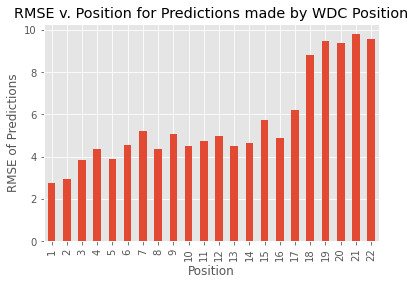

In [15]:
# Visualizes the RMSE for guesses concerning each position, according to the WDC Standings baseline
position_rmse = pd.DataFrame({'position': range(1,23)})
rmse_list = []

for i in position_rmse['position']:
    df = clean_data[clean_data['positionOrder'] == i]
    rmse = mean_squared_error(df['positionOrder'], df['wdcPos']) ** .5
    rmse_list.append(rmse)

position_rmse['rmse'] = rmse_list

position_rmse['rmse'].plot(kind='bar')
plt.xlabel('Position')
plt.xticks(position_rmse.index, position_rmse['position'])
plt.ylabel('RMSE of Predictions')
plt.title('RMSE v. Position for Predictions made by WDC Position')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

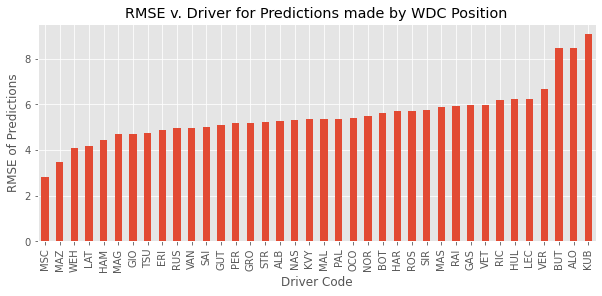

In [75]:
# Visualizes the RMSE for guesses concerning each driver, according to the WDC Standings baseline (minimum sample of 20 races)
driver_rmse = pd.DataFrame({'driverId': driver_list})
rmse_list = []
code_list = []

for drivers in driver_rmse['driverId']:
    df = clean_data[clean_data['driverId'] == drivers]
    if df.shape[0] > 20:
        rmse = mean_squared_error(df['positionOrder'], df['wdcPos']) ** .5
        code = clean_data[clean_data['driverId'] == drivers]['code'].to_list()[0]
        rmse_list.append(rmse)
        code_list.append(code)
    else:
        driver_rmse.drop(driver_rmse[driver_rmse['driverId'] == drivers].index, axis=0, inplace=True)

driver_rmse['code'] = code_list
driver_rmse['rmse'] = rmse_list

driver_rmse.sort_values(by='rmse', inplace=True)
driver_rmse.reset_index(drop=True, inplace=True)

driver_rmse['rmse'].plot(kind='bar', figsize=(10,4))
plt.xlabel('Driver Code')
plt.xticks(driver_rmse.index, driver_rmse['code'])
plt.ylabel('RMSE of Predictions')
plt.title('RMSE v. Driver for Predictions made by WDC Position')
plt.show

In [59]:
# Scores the algorithm's guesses for 2021 and compares them to the BOTG Predictions
df_check = pd.read_csv('f1_archive/botg_prediction_checker.csv')

races_2021 = df_check['raceId']
races_other = []

x_races = data['raceId'].drop_duplicates().to_list()
for races in x_races:
    if races in races_2021:
        pass
    else:
        races_other.append(races)

botg_preds = df_check.copy()

botg_preds['modelWinner'] = ''
botg_preds['modelDnf1'] = ''
botg_preds['modelRandomPos'] = ''
botg_preds['score'] = 0

for i in botg_preds.index:
    raceId = botg_preds.loc[i,'raceId']
    randomId = botg_preds.loc[i,'randomId']

    winner = clean_data[(clean_data['raceId'] == raceId) & (clean_data['wdcPos'] == 1)]['driverId'].to_list()[0]
    winner_name = drivers[drivers['driverId'] == winner]['forename'].to_list()[0] + ' ' + drivers[drivers['driverId'] == winner]['surname'].to_list()[0]

    try:
        dnf1 = clean_data[(clean_data['raceId'] == raceId) & (clean_data['wdcPos'] == 20)]['driverId'].to_list()[0]
    except:
        dnf1 = 849
    if dnf1 == 849:
        try:
            dnf1 = clean_data[(clean_data['raceId'] == raceId) & (clean_data['wdcPos'] == 21)]['driverId'].to_list()[0]
        except:
            dnf1 = 849

    dnf1_name = drivers[drivers['driverId'] == dnf1]['forename'].to_list()[0] + ' ' + drivers[drivers['driverId'] == dnf1]['surname'].to_list()[0]

    randomPos = clean_data[(clean_data['raceId'] == raceId) & (clean_data['driverId'] == randomId)]['wdcPos'].to_list()[0]

    botg_preds.loc[i,'modelWinner'] = winner_name
    botg_preds.loc[i,'modelDnf1'] = dnf1_name
    botg_preds.loc[i,'modelRandomPos'] = randomPos

    score = 0

    if winner_name == botg_preds.loc[i,'winner']:
        score += 1

    if dnf1_name == botg_preds.loc[i,'dnf1']:
        score += 1

    if randomPos == botg_preds.loc[i,'randomPos']:
        score += 1

    botg_preds.loc[i,'score'] = score

print('The Baseline Scored:', sum(botg_preds['score']))
botg_preds.head(22)

The Baseline Scored: 13


,Unnamed: 0,raceId,round,name,botgId,winner,dnf1,randomDriver,randomId,randomPos,modelWinner,modelDnf1,modelRandomPos,score
0,0,1052,1,Bahrain Grand Prix,62,Lewis Hamilton,Nikita Mazepin,Antonio Giovinazzi,841.0,12.0,Lewis Hamilton,Nicholas Latifi,17.0,1
1,1,1053,2,Emilia Romagna Grand Prix,63,Max Verstappen,Nicholas Latifi,Sebastian Vettel,20.0,15.0,Lewis Hamilton,Nikita Mazepin,15.0,1
2,2,1054,3,Portuguese Grand Prix,64,Lewis Hamilton,Kimi Raikkonen,George Russell,847.0,16.0,Lewis Hamilton,Nicholas Latifi,16.0,2
3,3,1055,4,Spanish Grand Prix,65,Lewis Hamilton,Yuki Tsunoda,Daniel Ricciardo,817.0,6.0,Lewis Hamilton,Nicholas Latifi,7.0,1
4,4,1056,5,Monaco Grand Prix,66,Max Verstappen,Charles Leclerc,Lando Norris,846.0,3.0,Lewis Hamilton,Nikita Mazepin,4.0,0
5,5,1057,6,Azerbaijan Grand Prix,67,Sergio Perez,Esteban Ocon,Yuki Tsunoda,852.0,7.0,Max Verstappen,Nikita Mazepin,14.0,0
6,6,1059,7,French Grand Prix,68,Max Verstappen,Nikita Mazepin,Sergio Perez,815.0,3.0,Max Verstappen,Nicholas Latifi,3.0,2
7,7,1058,8,Styrian Grand Prix,69,Max Verstappen,Pierre Gasly,Nikita Mazepin,853.0,18.0,Max Verstappen,Nicholas Latifi,19.0,1
8,8,1060,9,Austrian Grand Prix,70,Max Verstappen,Esteban Ocon,Valtteri Bottas,822.0,2.0,Max Verstappen,Nicholas Latifi,5.0,1
9,9,1061,10,British Grand Prix,71,Lewis Hamilton,Max Verstappen,Lewis Hamilton,1.0,1.0,Max Verstappen,Nicholas Latifi,2.0,0


The RMSE for Total Points using the Baseline is: 38.723531666958074


<function matplotlib.pyplot.show(close=None, block=None)>

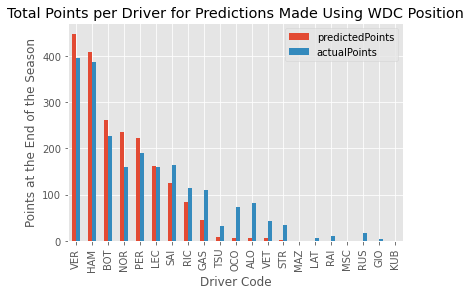

In [138]:
# Predicts the number of points that each driver will get in the 2021 season, and finds the RMSE
pos_to_points = {1:25, 2:18, 3:15, 4:12, 5:10, 6:8, 7:6, 8:4, 9:2, 10:1,
                 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0,
                 21:0, 22:0, 23:0, 24:0, 25:0, 26:0, 27:0, 28:0, 29:0, 30:0,
                 31:0, 53:0, 68:0, 86:0}

points_df = clean_data[['raceId', 'driverId', 'code', 'positionOrder', 'wdcPos']].copy()
points_df = points_df[points_df['raceId'].isin(races_2021)]
points_df['points'] = np.nan

for i in points_df.index:
    points = pos_to_points[int(points_df.loc[i,'wdcPos'])]
    points_df.loc[i,'points'] = points

final_points = pd.DataFrame({'driverId': points_df['driverId'].drop_duplicates()})
final_points.reset_index(drop=True, inplace=True)

final_points['code'] = ''
final_points['predictedPoints'] = 0
final_points['actualPoints'] = 0

for i,drivers in enumerate(final_points['driverId']):
    predicted_points = points_df[points_df['driverId'] == drivers]['points'].sum()
    actual_points = wdc[(wdc['raceId'] == 1073) & (wdc['driverId'] == drivers)]['points'].to_list()[0]
    code = points_df[points_df['driverId'] == drivers]['code'].to_list()[0]
    final_points.loc[i,'code'] = code
    final_points.loc[i,'predictedPoints'] = predicted_points
    final_points.loc[i,'actualPoints'] = actual_points

final_points.sort_values(by='predictedPoints', ascending=False, inplace=True)
final_points.reset_index(drop=True, inplace=True)

print('The RMSE for Total Points using the Baseline is:', mean_squared_error(final_points['actualPoints'], final_points['predictedPoints']) ** .5)

final_points[['predictedPoints', 'actualPoints']].plot(kind='bar')
plt.xlabel('Driver Code')
plt.xticks(final_points.index, final_points['code'])
plt.ylabel('Points at the End of the Season')
plt.title('Total Points per Driver for Predictions Made Using WDC Position')
plt.show

### Visualizing Relavent Factors

In [61]:
# Normalizes factors on a scale of 0-1
from sklearn.preprocessing import MinMaxScaler

factor_list = ['fp1Pos', 'fp2Pos', 'lastPos', 'lastPos2', 'lastPos3', 'lastPos4', 'lastPos5', 'lastPos6', 'lastGrid', 'lastGrid2','lastGrid3', 'wdcPos', 'wccPos', 'trackPref', 'experience']
scaled = MinMaxScaler().fit_transform( np.asarray(data[factor_list]))

for i,cols in enumerate(factor_list):
    data[cols] = list(scaled[:,i])
        
# Inverts the values for everything but experience, so that high numbers are always good
for factors in factor_list[:-1]:

    for i in data.index:
        data.loc[i,factors] = 1 - data.loc[i,factors]

# Selects the data and fills nans
for i in data.index:
    try:
        guess = data.loc[i, factor_list].mean()
    except:
        guess = .5
    
    for factors in factor_list:
        if pd.isna(data.loc[i, factors]):
            data.loc[i, factors] = guess
    

# Orders the list by position in the previous race to remove bias
data.sort_values(by=['lastPos', 'experience', 'raceId'], ascending=False, inplace=True)

# Creates a column with the inverse position order
data['positionOrderInver'] = 0

for i in data.index:
    id = data.loc[i, 'raceId']
    max = data[data['raceId'] == id]['positionOrder'].max()
    data['positionOrderInver'] = abs(data['positionOrder'] - (max + 1))

data.head(5)

,resultId,raceId,driverId,constructorId,positionOrder,fp1Pos,fp2Pos,code,circuitId,year,...,lastPos5,lastPos6,lastGrid,lastGrid2,lastGrid3,wdcPos,wccPos,experience,trackPref,positionOrderInver
2009,24145,1007,8,6,3,0.681818,0.666667,RAI,32,2018,...,0.952381,0.952381,0.909091,0.818182,0.818182,0.913043,0.9,0.822289,0.850730,20
3248,25387,1073,1,131,2,0.909091,1.000000,HAM,24,2021,...,0.952381,0.952381,0.954545,0.954545,0.545455,0.956522,1.0,0.801205,0.000000,21
3227,25366,1072,1,131,1,1.000000,1.000000,HAM,77,2021,...,0.809524,0.809524,0.954545,0.545455,0.909091,0.956522,1.0,0.801205,0.906473,22
3131,25270,1067,1,131,5,1.000000,1.000000,HAM,5,2021,...,0.952381,0.952381,0.818182,0.818182,0.909091,1.000000,1.0,0.801205,0.881904,18
3028,25167,1062,1,131,2,0.909091,0.952381,HAM,11,2021,...,0.333333,0.333333,0.909091,0.818182,0.909091,0.956522,0.9,0.801205,0.360100,21


Text(0.5, 1.0, 'Previous Finishing Position v. Finishing Position')

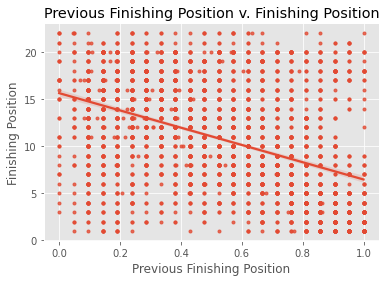

In [62]:
# Charts relavant variables v. positionOrder
sns.regplot(x='lastPos', y='positionOrder', data=data, marker='.')
plt.xlabel('Previous Finishing Position')
plt.ylabel('Finishing Position')
plt.title('Previous Finishing Position v. Finishing Position')

Text(0.5, 1.0, 'WDC Position v. Finishing Position')

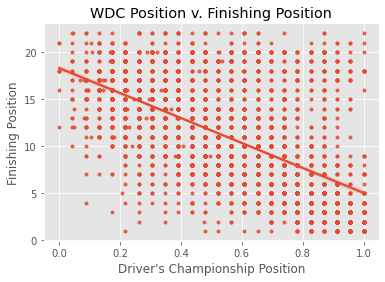

In [63]:
sns.regplot(x='wdcPos', y='positionOrder', data=data, marker='.')
plt.xlabel("Driver's Championship Position")
plt.ylabel('Finishing Position')
plt.title('WDC Position v. Finishing Position')

Text(0.5, 1.0, 'Track Preference v. Finishing Position')

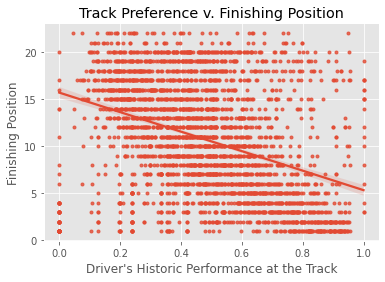

In [64]:
sns.regplot(x='trackPref', y='positionOrder', data=data, marker='.')
plt.xlabel("Driver's Historic Performance at the Track")
plt.ylabel('Finishing Position')
plt.title('Track Preference v. Finishing Position')

### Exploration of Randomness in F1 Results

In [140]:
res.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [202]:
df_ran = res[['raceId', 'driverId', 'positionOrder']].copy()
df_ran['wdcPos'] = np.nan
df_ran['year'] = np.nan

for i in df_ran.index:
    try:
        driver_id = df_ran.loc[i,'driverId']
        current_id = df_ran.loc[i,'raceId']
        last_id = find_last(current_id)
        
        try:
            wdc_pos = wdc[(wdc['raceId'] == last_id) & (wdc['driverId'] == driver_id)]['position'].to_list()[0]
            df_ran.loc[i,'wdcPos'] = wdc_pos
        except:
            pass

        try:
            year = races[races['raceId'] == current_id]['year'].to_list()[0]
            df_ran.loc[i,'year'] = year
        except:
            pass
    
    except:
        pass

df_ran.head()

,raceId,driverId,positionOrder,wdcPos,year
0,18,1,1,2.0,2008.0
1,18,2,2,5.0,2008.0
2,18,3,3,9.0,2008.0
3,18,4,4,3.0,2008.0
4,18,5,5,7.0,2008.0


<AxesSubplot:xlabel='wdcPos', ylabel='positionOrder'>

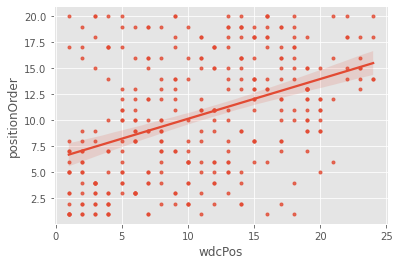

In [203]:
df_2009 = df_ran[df_ran['year'] == 2009]

sns.regplot(x='wdcPos', y='positionOrder', data=df_2009, marker='.')


Text(0, 0.5, 'Predictability Score')

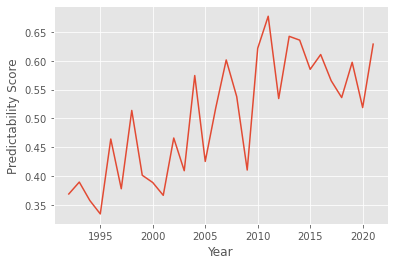

In [225]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

all_years = df_ran['year'].dropna().drop_duplicates().to_list()

ran_by_year = pd.DataFrame({'year':all_years})

for i,years in enumerate(all_years):
    df = df_ran[df_ran['year'] == years].dropna(axis=0, how='any')
    #df.drop(df[df['positionOrder'] > 11].index, axis=0, inplace=True)
    x = np.array(df['wdcPos'].to_list())
    y = np.array(df['positionOrder'].to_list())
    
    try:
        ran_by_year.loc[i,'r_value'], ran_by_year.loc[i,'p_value'] = pearsonr(x,y)
    
    except:
        pass

ran_by_year.sort_values(by='year', inplace=True)
ran_by_year.set_index('year', drop=True, inplace=True)
ran_by_year.tail(20)

ran_by_year['r_value'].tail(30).plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Predictability Score')



In [228]:
ran_by_year.tail(8)['r_value'].mean()

0.584947851278637

In [229]:
len(factor_list)

15